## Install Open MMLab Detection Toolbox

In [1]:
!pip install torch==1.4.0 torchvision==0.5.0
!pip install pillow==6.1.0
!pip install numpy==1.17.0
import sys
import os
from PIL import Image,ImageDraw,ImageFont
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
import glob
import pandas as pd

if ('google.colab' in sys.modules):
  from google.colab import drive
  drive.mount('/content/gdrive')
  gdrive_root = 'gdrive/My Drive/Deep_Learning/'
  dataset_path = os.path.join(gdrive_root,'Dataset/visdrone_dl')
  image_path =  os.path.join(dataset_path,'train2017')
  annotation_path = os.path.join(dataset_path,'train2017_ann/annotations')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import os
from os.path import exists, join, basename, splitext
working_folder = os.getcwd()
git_repo_url = 'https://github.com/open-mmlab/mmdetection'


mmdetection_dir = os.path.join(working_folder, "mmdetection")
if not exists(mmdetection_dir):
    ! git clone -q --recurse-submodules  $git_repo_url
    print("Update mmdetection repo")
    !cd {mmdetection_dir} && git checkout master && git pull
    # dependencies
    !pip install -q mmcv terminaltables
    # build
    !cd {mmdetection_dir} && python setup.py install
    !pip install -r {os.path.join(mmdetection_dir, "requirements.txt")}

## Read config file

### Verify the checkpoint file exists.

In [0]:
config_file = "/content/gdrive/My Drive/Deep_Learning/VisDrone/config/retinanet_r50_fpn_1x_cleaned.py"
checkpoint_file = "/content/gdrive/My Drive/Deep_Learning/VisDrone/model/cleaned_latest.pth"

## Test predict

Turn down the `score_thr` if you think the model is missing any bbox.
Turn up the `score_thr` if you see too much overlapping bboxes with low scores.

In [0]:
import time
import matplotlib
import matplotlib.pylab as plt
plt.rcParams["axes.grid"] = False

import mmcv
from mmcv.runner import load_checkpoint
import mmcv.visualization.image as mmcv_image
# fix for colab


def imshow(img, win_name='', wait_time=0): plt.figure(
    figsize=(50, 50)); plt.imshow(img)


mmcv_image.imshow = imshow
from mmdet.models import build_detector
from mmdet.apis import inference_detector, show_result, init_detector

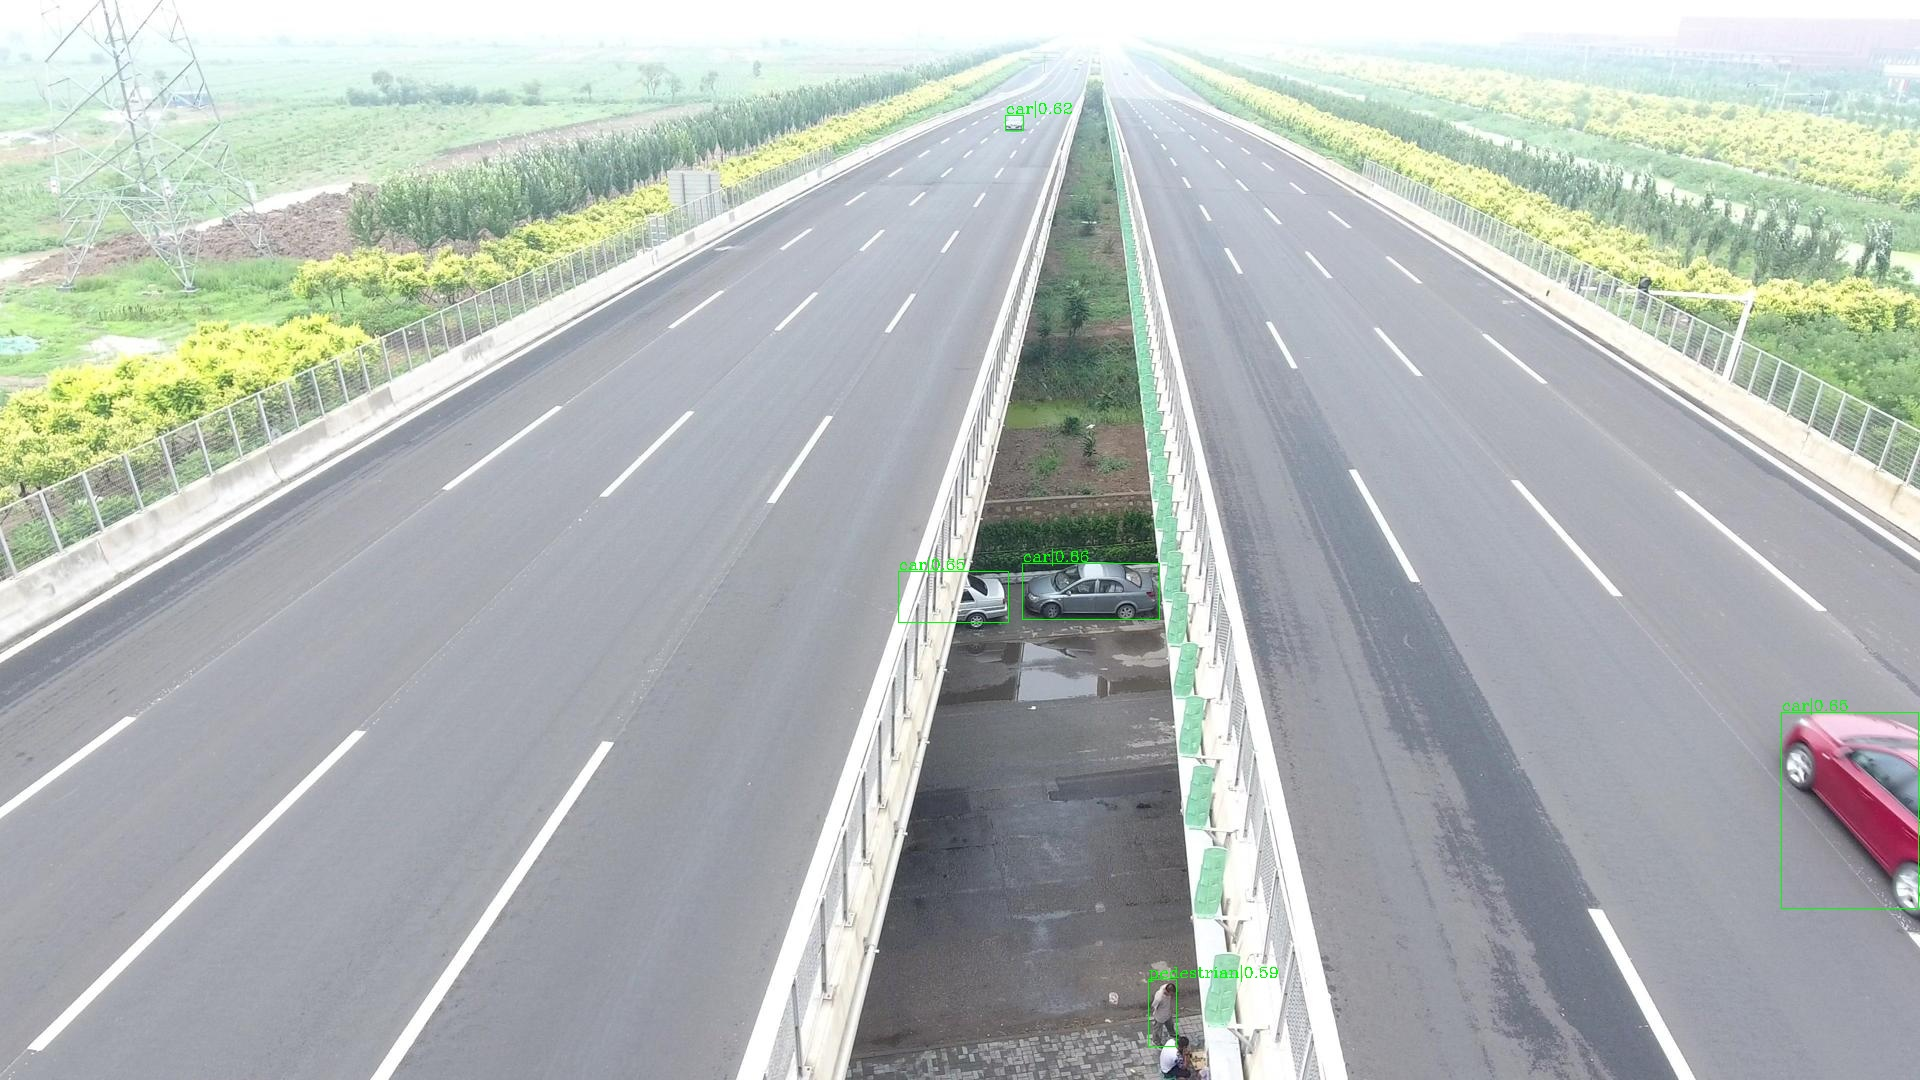

In [14]:
score_thr = 0.5

# build the model from a config file and a checkpoint file
model = init_detector(config_file, checkpoint_file)

# test a single image and show the results
img = '/content/gdrive/My Drive/Deep_Learning/Dataset/visdrone_dl/upload_val/val/0000283_00401_d_0000676.jpg'
classes_names = ['pedestrian', 'people', 'bicycle', 'car', 'van', 'truck', 'tricycle', 'awning-tricycle', 'bus', 'motor']
result = inference_detector(model, img)
show_result(img, result, classes_names,
            score_thr=score_thr, out_file="result.jpg")
from IPython.display import Image
Image(filename='result.jpg')


In [25]:
for i in range(0,10):
  for x,y,w,h,s in result[i]:
    if(s>0.5):
      print(f'{x} {y} {w} {h} {i}')

1148.234619140625 979.1607055664062 1176.5543212890625 1046.5850830078125 0
1022.0507202148438 563.3106079101562 1159.344482421875 619.5184936523438 3
898.1408081054688 571.6778564453125 1008.5789184570312 622.211181640625 3
1781.90966796875 712.4066162109375 1918.5595703125 908.920654296875 3
1005.0161743164062 115.1232681274414 1023.4603881835938 130.5536651611328 3
